<a href="https://colab.research.google.com/github/minhcong00/AI/blob/main/BT_AI_W9_CIFAR10_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10
(x_train, y_train),(x_test,y_test)=cifar10.load_data()

In [2]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
classes={0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog',
         6:'frog', 7:'horse', 8:'ship', 9:'truck'}

anh nay la: [4]


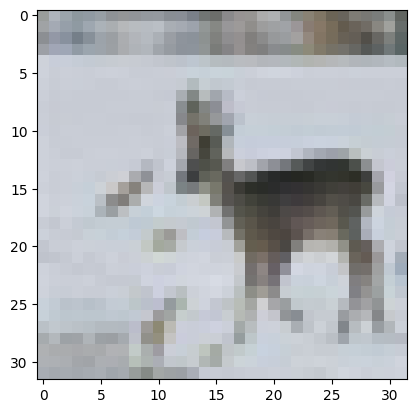

In [4]:
digit=x_train[20]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show
print('anh nay la:',y_train[20])

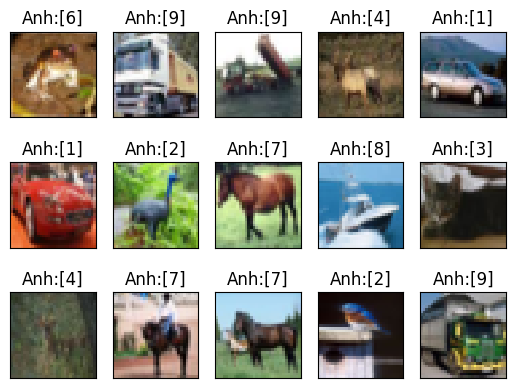

In [5]:
for i in range(15):
  plt.subplot(3,5,1+i)
  plt.tight_layout
  plt.imshow(x_train[i],cmap='gray', interpolation='none')
  plt.title('Anh:{}'.format(y_train[i])) 
  plt.xticks([])
  plt.yticks([])

In [6]:
from keras.layers.serialization import activation
from keras.models import Sequential
from keras.layers import Dense 

model=Sequential() 
model.add(Dense(5000,activation='relu', input_shape=(32*32*3,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5000)              15365000  
                                                                 
 dense_1 (Dense)             (None, 512)               2560512   
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 18,059,410
Trainable params: 18,059,410
Non-trainable params: 0
_________________________________________________________________


In [7]:
x_train=x_train.reshape((50000,32*32*3))
x_train=x_train.astype('float32')/255
x_train.shape

(50000, 3072)

In [8]:
x_test=x_test.reshape((10000,32*32*3))
x_test=x_test.astype('float32')/255
x_test.shape

(10000, 3072)

In [9]:
from keras.utils import to_categorical
y_train= to_categorical(y_train,10)
y_train.shape 

(50000, 10)

In [10]:
y_test= to_categorical(y_test,10)
y_test.shape 

(10000, 10)

In [11]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20,batch_size=256)
test_loss,test_acc= model.evaluate(x_test, y_test)
print('Do mat mat:',test_loss)
print('Do chinh xac:',test_acc)

Epoch 1/20
196/196 [==============================] - 127s 642ms/step - loss: 2.6134 - accuracy: 0.2097
Epoch 2/20
196/196 [==============================] - 124s 635ms/step - loss: 1.8957 - accuracy: 0.3166
Epoch 3/20
196/196 [==============================] - 129s 660ms/step - loss: 1.8021 - accuracy: 0.3526
Epoch 4/20
196/196 [==============================] - 129s 659ms/step - loss: 1.7275 - accuracy: 0.3808
Epoch 5/20
196/196 [==============================] - 127s 649ms/step - loss: 1.6736 - accuracy: 0.4015
Epoch 6/20
196/196 [==============================] - 129s 658ms/step - loss: 1.6206 - accuracy: 0.4188
Epoch 7/20
196/196 [==============================] - 128s 654ms/step - loss: 1.5772 - accuracy: 0.4352
Epoch 8/20
196/196 [==============================] - 125s 640ms/step - loss: 1.5447 - accuracy: 0.4498
Epoch 9/20
196/196 [==============================] - 127s 647ms/step - loss: 1.5015 - accuracy: 0.4618
Epoch 10/20
196/196 [==============================] - 128s 654m

In [12]:
from keras.saving.saving_api import load_model
model.save('cifar10.h5')

In [13]:
model10=load_model('cifar10.h5')

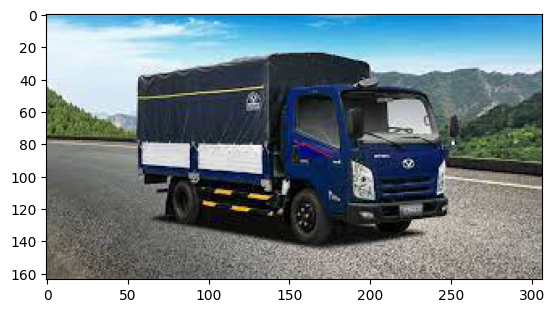

In [16]:
from keras.utils import load_img
url = '/content/xetai.jpg'
img = load_img(url)
plt.imshow(img)

1/1 [==============================] - 0s 36ms/step
Anh nay la:  9


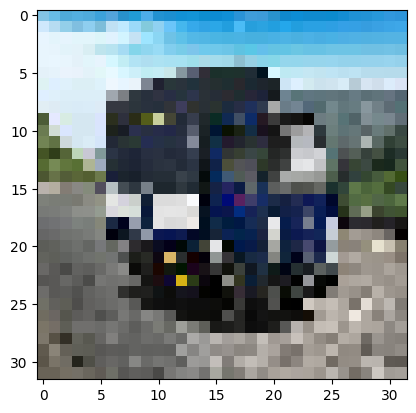

In [17]:
from keras.utils import load_img, img_to_array
import numpy as np
img = load_img(url, target_size = (32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255   
pred_value = np.argmax(model.predict(img))
print('Anh nay la: ', pred_value)

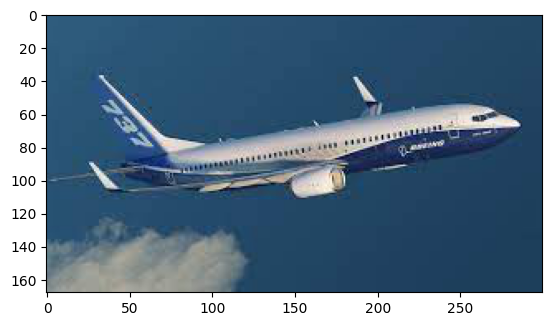

In [20]:
from keras.utils import load_img
url = '/content/airplane.jpg'
img = load_img(url)
plt.imshow(img)

1/1 [==============================] - 0s 37ms/step
anh nay la:  0


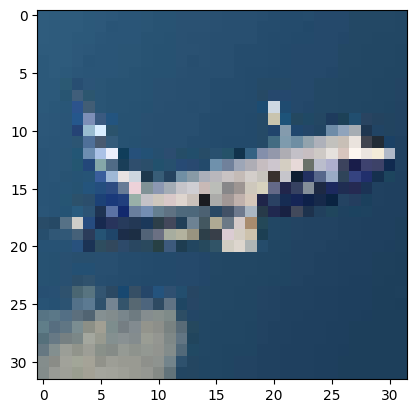

In [21]:
from keras.utils import load_img, img_to_array
import numpy as np
img = load_img(url, target_size = (32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255   
pred_value = np.argmax(model.predict(img))
print('anh nay la: ', pred_value)

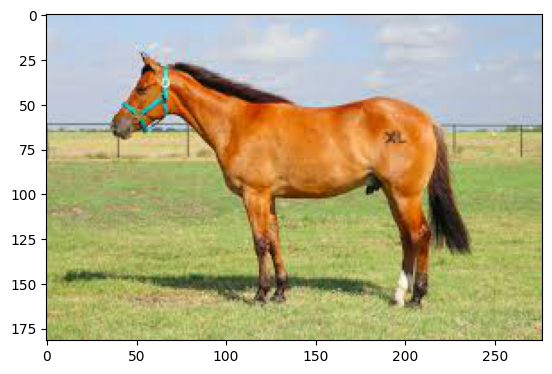

In [24]:
from keras.utils import load_img
url = '/content/conngua.jpg'
img = load_img(url)
plt.imshow(img)

1/1 [==============================] - 0s 35ms/step
anh nay la:  7


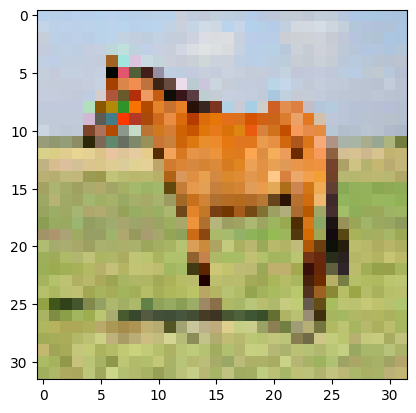

In [25]:
from keras.utils import load_img, img_to_array
import numpy as np
img = load_img(url, target_size = (32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255   
pred_value = np.argmax(model.predict(img))
print('anh nay la: ', pred_value)